## Problem Set 5
-Hierarchical Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
X = np.array([[0.40,0.53],
              [0.22,0.32],
              [0.35,0.32],
              [0.26,0.19],
              [0.08,0.41],
              [0.35,0.30],
              [0.80,0.98],
              [0.28,0.33]
])

In [3]:
class Dist_comp_grid(object):

    def __init__(self):
        pass
    
    def comp_dist(self,samples):
        '''
            Creates a matrix of distances between individual samples and clusters attained at a particular step
        '''
        Distance_mat = np.zeros((len(samples),len(samples)))
        for i in range(Distance_mat.shape[0]):
            for j in range(Distance_mat.shape[0]):
                if i!=j:
                    Distance_mat[i,j] = float(self.distance_calculate(samples[i],samples[j]))
                else:
                    Distance_mat[i,j] = 10**4
        return Distance_mat
    
    
    def distance_calculate(self,sample1,sample2):
        '''
            Distance calulated between two samples. 
        '''
        dist = []
        for i in range(len(sample1)):
            for j in range(len(sample2)):
                try:
                    dist.append(np.linalg.norm(np.array(sample1[i])-np.array(sample2[j])))
                except:
                    dist.append(self.intersampledist(sample1[i],sample2[j]))
        return min(dist)
    
    
    def intersampledist(self,s1,s2):
        '''
            'interclusterdist' is used to compute the distances between elements of a cluster.
        '''
        if str(type(s2[0]))!='<class \'list\'>':
            s2=[s2]
        if str(type(s1[0]))!='<class \'list\'>':
            s1=[s1]
        m = len(s1)
        n = len(s2)
        dist = []
        if n>=m:
            for i in range(n):
                for j in range(m):
                    if (len(s2[i])>=len(s1[j])) and str(type(s2[i][0])!='<class \'list\'>'):
                        dist.append(self.interclusterdist(s2[i],s1[j]))
                    else:
                        dist.append(np.linalg.norm(np.array(s2[i])-np.array(s1[j])))
        else:
            for i in range(m):
                for j in range(n):
                    if (len(s1[i])>=len(s2[j])) and str(type(s1[i][0])!='<class \'list\'>'):
                        dist.append(self.interclusterdist(s1[i],s2[j]))
                    else:
                        dist.append(np.linalg.norm(np.array(s1[i])-np.array(s2[j])))
        return min(dist)
    
    def interclusterdist(self,cl,sample):
        if sample[0]!='<class \'list\'>':
            sample = [sample]
        dist   = []
        for i in range(len(cl)):
            for j in range(len(sample)):
                dist.append(np.linalg.norm(np.array(cl[i])-np.array(sample[j])))
        return min(dist)

In [6]:
progression = [[i] for i in range(X.shape[0])]
samples     = [[list(X[i])] for i in range(X.shape[0])]
m = len(samples)
distcal  = Dist_comp_grid()

while m>1:
    print('Sample size before clustering    :- ',m)
    Distance_mat      = distcal.comp_dist(samples)
    sample_ind_needed = np.where(Distance_mat==Distance_mat.min())[0]
    value_to_add      = samples.pop(sample_ind_needed[1])
    samples[sample_ind_needed[0]].append(value_to_add)
    
    print('Cluster Node 1                   :-',progression[sample_ind_needed[0]])
    print('Cluster Node 2                   :-',progression[sample_ind_needed[1]])
    
    progression[sample_ind_needed[0]].append(progression[sample_ind_needed[1]])
    progression[sample_ind_needed[0]] = [progression[sample_ind_needed[0]]]
    v = progression.pop(sample_ind_needed[1])
    m = len(samples)
    
    print('Progression(Current Sample)      :-',progression)
    print('Cluster attained                 :-',progression[sample_ind_needed[0]])
    print('Sample size after clustering     :-',m)
    print('\n')

Sample size before clustering    :-  8
Cluster Node 1                   :- [2]
Cluster Node 2                   :- [5]
Progression(Current Sample)      :- [[0], [1], [[2, [5]]], [3], [4], [6], [7]]
Cluster attained                 :- [[2, [5]]]
Sample size after clustering     :- 7


Sample size before clustering    :-  7
Cluster Node 1                   :- [1]
Cluster Node 2                   :- [7]
Progression(Current Sample)      :- [[0], [[1, [7]]], [[2, [5]]], [3], [4], [6]]
Cluster attained                 :- [[1, [7]]]
Sample size after clustering     :- 6


Sample size before clustering    :-  6
Cluster Node 1                   :- [[1, [7]]]
Cluster Node 2                   :- [[2, [5]]]
Progression(Current Sample)      :- [[0], [[[1, [7]], [[2, [5]]]]], [3], [4], [6]]
Cluster attained                 :- [[[1, [7]], [[2, [5]]]]]
Sample size after clustering     :- 5


Sample size before clustering    :-  5
Cluster Node 1                   :- [[[1, [7]], [[2, [5]]]]]
Cluster Nod

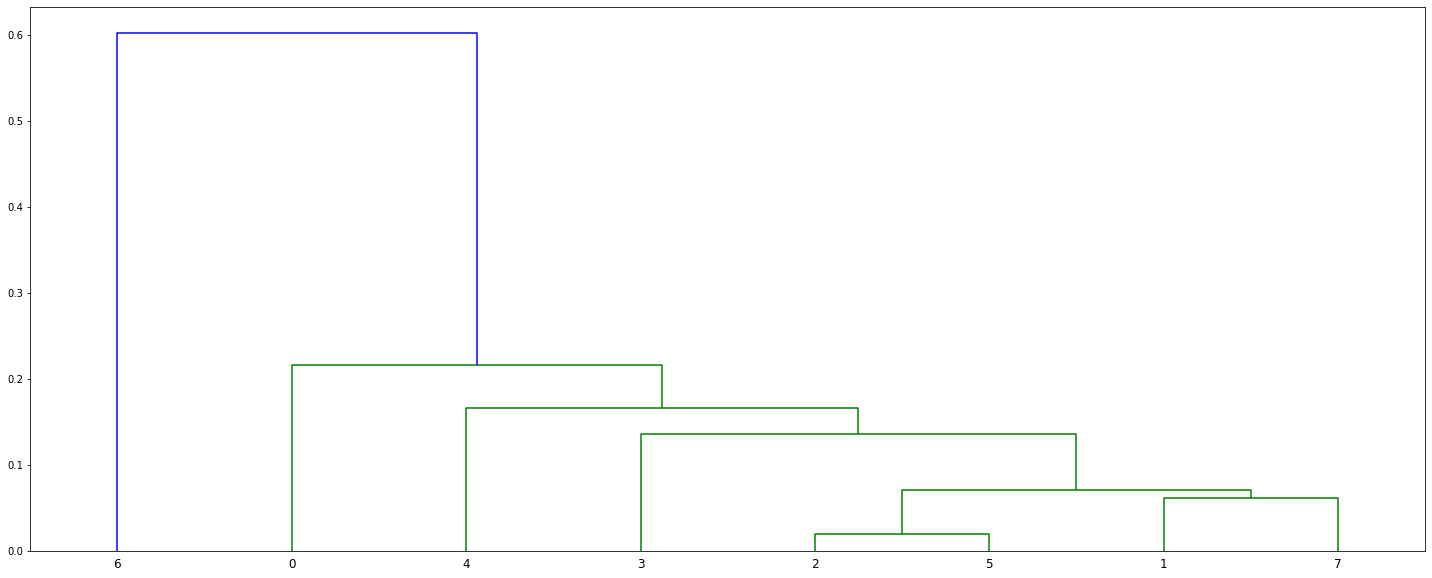

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
Z = linkage(X, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

In [8]:
from sklearn.cluster import AgglomerativeClustering
aggclus = AgglomerativeClustering().fit(X)
aggclus.labels_

array([0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)